# Topic Modeling

In [1]:
# Data Processing 
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from pprint import pprint

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

#Gensim vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

## Import and data processing 

In [2]:
# load dataset
df = pd.read_excel("/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/Poems_Cleaned.xlsx")

In [3]:
# data processing

# Stop Words
nltk.download("stopwords")
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

# Expande Arabic StopWords
data = []
with open('/Users/muneraalrajhi/Desktop/Capstone Project/CapstoneProject/data/arabic_stop_words.txt','r') as myfile:
    for line in myfile:
        data.extend(map(str, line.rstrip('\n').split(',')))
arabic_stopwords.update(data)

# Tokenaize
df['Processed Poems'] = df['Poem'].map(word_tokenize)

# Stemmer
st = ISRIStemmer()
df['Processed Poems'] = df['Processed Poems'].apply(lambda x: [st.stem(y) for y in x])


# Remove Stop Words
df['Processed Poems']= df['Processed Poems'].apply(lambda x: [item for item in x if item not in arabic_stopwords])


df['Processed Poems'].sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muneraalrajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2342     [رفق, حتت, جبر, فقل, رفق, غئب, شهد, اصم, ندي, ...
7721     [خده, سرى, ماء, جمل, وسر, سطع, اخذ, خدي, جهنم,...
12000    [ماء, بسط, زهر, نشر, روض, لحف, لجو, عجر, شمس, ...
5658     [بده, فكر, رمت, جمع, كفه, حيا, طلب, لسر, صدر, ...
12217    [يحس, صفا, سعا, يطب, زمن, منى, نهض, كعب, حسن, ...
3440     [خلل, قيس, عيل, حلا, ركب, عرج, عرج, بعش, يمن, ...
8359     [نام, فكل, مجد, نام, سفي, دمع, غمم, رمل, رقد, ...
10797    [طيف, حبب, زار, طرق, مطا, قنن, شعب, كور, ضاء, ...
3715     [خير, أشرف, سعد, مجد, تلد, بشر, رب, ذكء, لحت, ...
6587     [هنئ, أهل, شرق, حضر, قدس, شمس, جلت, وار, ظلم, ...
Name: Processed Poems, dtype: object

In [4]:
data_words = df['Processed Poems']

In [5]:
# create bag of words
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [6]:
# create lda model topic model 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word, num_topics=9, random_state=123, chunksize=100, alpha='auto', per_word_topics=True)

#print the result of the model
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"بدر" + 0.008*"زهر" + 0.008*"شعر" + 0.007*"ليل" + 0.007*"ماء" + '
  '0.007*"بحر" + 0.007*"نور" + 0.006*"سحر" + 0.006*"نظر" + 0.005*"صدر"'),
 (1,
  '0.037*"قلب" + 0.020*"هوى" + 0.015*"دمع" + 0.014*"شوق" + 0.011*"لحظ" + '
  '0.011*"عشق" + 0.010*"فرق" + 0.009*"لحب" + 0.009*"حبب" + 0.008*"صبح"'),
 (2,
  '0.022*"حبه" + 0.022*"هوك" + 0.017*"مدح" + 0.016*"رجء" + 0.016*"وسق" + '
  '0.016*"ريق" + 0.015*"عذل" + 0.015*"صب" + 0.013*"ريا" + 0.013*"رضب"'),
 (3,
  '0.020*"حسن" + 0.012*"جمل" + 0.010*"دهر" + 0.008*"وصل" + 0.008*"كنت" + '
  '0.007*"روح" + 0.007*"اني" + 0.007*"عذر" + 0.006*"عرض" + 0.006*"زمن"'),
 (4,
  '0.024*"دمى" + 0.022*"دمي" + 0.019*"فلل" + 0.015*"كلب" + 0.015*"ابك" + '
  '0.012*"تصل" + 0.011*"تول" + 0.011*"وحب" + 0.011*"ضيف" + 0.011*"رضع"'),
 (5,
  '0.009*"كرم" + 0.007*"طلع" + 0.006*"سيف" + 0.006*"غرب" + 0.006*"شمس" + '
  '0.006*"سلم" + 0.006*"وجه" + 0.005*"طرف" + 0.005*"عجب" + 0.005*"حمد"'),
 (6,
  '0.011*"ظبي" + 0.010*"يلى" + 0.010*"غزل" + 0.009*"ظبء" + 0.009*"غلل" +

In [7]:
# Topic Modeling viz
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/Users/muneraalrajhi/opt/anaconda3/envs/tf/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.280402  0.228998       1        1  26.319111
0      0.317834  0.004373       2        1  21.757813
3      0.118990  0.209846       3        1  19.561137
1      0.003864 -0.034549       4        1  13.894340
7     -0.051214  0.324797       5        1  10.428058
6      0.213490 -0.297614       6        1   3.513347
8     -0.384142  0.149289       7        1   1.883378
2     -0.121830 -0.403455       8        1   1.450419
4     -0.377393 -0.181684       9        1   1.192397, topic_info=     Term         Freq        Total Category  logprob  loglift
183   قلب  8146.000000  8146.000000  Default  30.0000  30.0000
418   هوى  3472.000000  3472.000000  Default  29.0000  29.0000
54    حسن  6071.000000  6071.000000  Default  28.0000  28.0000
302   دمع  3196.000000  3196.000000  Default  27.0000  27.0000
2368  عذل  1292.000000  1292.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
5140  نجر   137.737176   152.081408   Topic9  -4.5844   4.3301
1346  ابك   202.059849   251.731509   Topic9  -4.2012   4.2094
4932  رضع   144.711224   172.129602   Topic9  -4.5350   4.2557
695   ضيف   145.899956   226.809619   Topic9  -4.5268   3.9880
7415  تفض    91.296621   120.947140   Topic9  -4.9956   4.1480

[606 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
4072      2  0.996015   أثر
4064      7  0.992773   أجب
2898      3  0.993714   أخر
6860      3  0.991059  أعجب
4204      9  0.992658   أعط
...     ...       ...   ...
5591      1  0.997391   يلم
1294      3  0.006187   يلى
1294      4  0.164991   يلى
1294      6  0.829078   يلى
8137      9  0.992585   يمى

[1620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 2, 8, 7, 9, 3, 5])

## Evaluate and Find the Optimal Model

In [8]:
#we will use topic coherence to evaluate our model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.29001836102855344


In [9]:
#function to compute different coherence values to find the optimal model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
#set the topic limit to 40
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=4)


In [11]:
# Find and select the optimal model
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]


print("The optimal model is: ",optimal_model)
print('Coherence score:',coherence_values[best_result_index])

The optimal model is:  LdaModel(num_terms=33435, num_topics=34, decay=0.5, chunksize=2000)
Coherence score: 0.4676139071900997


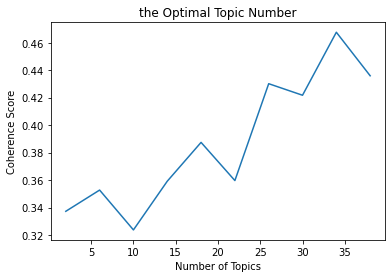

/Users/muneraalrajhi/opt/anaconda3/envs/tf/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/muneraalrajhi/opt/anaconda3/envs/tf/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/muneraalrajhi/opt/anaconda3/envs/tf/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/muneraalrajhi/opt/anaconda3/envs/tf/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/muner

In [12]:
# Optimal Topic number viz
x = range(2,40,4)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("the Optimal Topic Number")
plt.show()

#### Reference:
- How to Create an LDA Topic Model in Python with Gensim: https://www.youtube.com/watch?v=TKjjlp5_r7o
- Misk Skills Data Science Book: http://www.ylz.ncx.mybluehost.me/scavetta.academy/misk/11_nlp/materials/code/_build/html/04_nlp_unsupervised_learning.html